In [43]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img=cv2.imread('pic\logo.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(100,100))
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img.shape

(100, 100, 3)

In [44]:
#plt.imshow(output1,cmap="gray")
def image_show(img,gray=False):
    if gray==False:
        plt.imshow(img)
    else:
        plt.imshow(img,cmap='gray')
    plt.axis("off")
    plt.show()


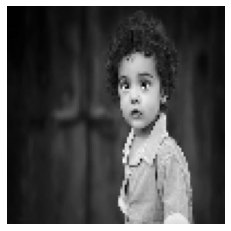

In [45]:
image_show(gray_img,True)

## main function use for the convolution

In [46]:
def convolution(img,img_filter):
    w=img.shape[0]
    h=img.shape[1]
    f=img_filter.shape[0]
    new_img=np.zeros((w-f+1,h-f+1))
    for row in range(w-f+1):
        for col in range(h-f+1):
            for i in range(f):
                for j in range(f):
                    new_img[row][col]+=img[row+i][col+j]*img_filter[i][j]
                if new_img[row][col]>255:
                    new_img[row][col]=255
                elif new_img[row][col]<0:
                    new_img[row][col]=0
    return new_img
blur_filter=np.ones((3,3))/9.0
output1=convolution(gray_img,blur_filter)


In [47]:
edge_filter=np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
output2=convolution(gray_img,edge_filter)

## padding 

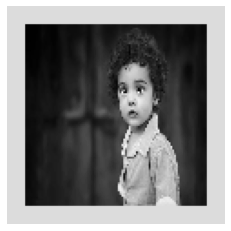

In [48]:

pad_img=np.pad(gray_img,((10,10),(10,10)),'constant',constant_values=200)
image_show(pad_img,gray=True)

## pooling

In [50]:
def pooling(x,mode="max",stride=2):
    f=2
    h,w=x.shape
    ho=int((h-f)/stride)+1
    wo=int((w-f)/stride)+1
    output=np.zeros((ho,wo))
    for r in range(ho):
        for c in range(wo):
            r_start=r*stride
            r_end=r_start+f
            c_start=c*stride
            c_end=c_start+f
            x_slice=x[r_start:r_end,c_start:c_end]
            if mode=="max":
                output[r][c]=np.max(x_slice)
            else:
                output[r][c]=np.mean(x_slice)
    return output


In [55]:
out_img=pooling(gray_img,mode="mean")

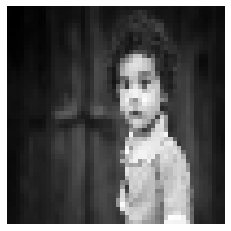

In [56]:
image_show(out_img,True)